<a href="https://colab.research.google.com/github/solankinitin1210/solankinitin1210-Capstone-Project-Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

**What has been given to us? (Input)**
- We have been given A Dataset with information on rented bike data for seoel bikes, 
- A dataset contains various independent variables like date, hour, weather condition, holiday etc and also the number of bikes rented for that particular hour of the day

**What do we need to achieve? (Required Output)**
- To create a model which is trained from the given data set and can able to predict the closest values of the required bike count for a given instance/Independent variable

**How will we approach it? (Process to follow)**
-	Import required libraries and data set
-	Based on initial observation take care of null values and perform EDA on data
-	plot each variable individually and check data distribution
-	Plot each variable versus the target variable and check the correlation
-	Prepare data for the ML model
- Prepare train and test dataset and fit it into the different machine learning algorithm
- Derived the different evaluation metrics for each ML model compare them
- Conclude which model gave the best performance to predict the rented bike count  

In [1]:
# Importing the libraries for process data
import pandas as pd
import numpy as np
from numpy import math

# Import libraries for ploting data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split # For prepare our train and test dataset
from sklearn.preprocessing import minmax_scale # For scaling our dataset 

# Import libraries for regression 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

# Import libraries for measure perfomance matrics 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
# Mount driver
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [377]:
# Import CSV file from drive 
# There were some special character in given file, so to encode the file I used encoding latin1
df=pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Project-2/SeoulBikeData (1).csv',encoding='latin1') 

In [359]:
# Let's check how our dataset look like
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [372]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30-11-2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30-11-2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30-11-2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30-11-2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30-11-2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [370]:
# Let's verify if there is any column with null values
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [371]:
# Let's check the statistics of columns
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


**Initial observation** 
- The Given dataset contain 8760 rows and 14 columns.
- No column was found with null values.
- Data contained by every column are in the required datatype except the "Date" column hence data type conversion is only required for the "Date" Column.
- Out of 14 columns, the Number 9 Columns contain the numeric data and 5 columns contain categoric data
- Our Dependent/Target variable is "Rented Bike Count", rest are Independent variable
- The data contained by our target variable is not in a normalized format, we conclude this by checking the mead and median values, the difference between mean and median is a huge number (200+)(We’ll verify this by plotting the chart)
- Our target variable contains the numeric data so our approach will be a regression model of machine learning.

# Deal with the "Date" Variable

In [373]:
# First let's convert data type of date varible from object to date
df['Date']=pd.to_datetime(df2['Date'],format="%d-%m-%y"))

In [379]:
df['Date'].dtypes

dtype('<M8[ns]')

In [383]:
import datetime
# Create three diffrent column of Date,month and year from date column 
df['year']=pd. DatetimeIndex(df['Date']).year
df['month']=df['Date'].dt.month_name()
df['day']=pd. DatetimeIndex(df['Date']).day

In [386]:
df['week']=df['Date'].dt.week

In [384]:
df['month'][:5]

0    December
1    December
2    December
3    December
4    December
Name: month, dtype: object

In [381]:
df['year']=pd. DatetimeIndex(df['Date']).year
df['month']=pd. DatetimeIndex(df['Date']).month
df['day']=pd. DatetimeIndex(df['Date']).day

In [396]:
# We Do not require Date column now so let's drop it
df.drop(['Date','month','day','year'], axis='columns', inplace=True)

In [397]:
# Verify our updated dataset
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,week
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,48
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,48
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,48
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,48
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,48


# **Let's Start Basic EDA**

In this section, we will explore our data by selecting some categorical variable and then we’ll plot a chart for categorical variable v/s Target variable, we’ll do this analysis as listed below
- Season wise analysis
- Holiday/Non-Day wise analysis
- Functional day-wise analysis
- Hour wise analysis

### Season wise analysis

In [13]:
# Let's perform Season wise analysis
season_wise_analysis=df.groupby('Seasons')['Rented Bike Count'].sum().reset_index().sort_values(by='Rented Bike Count',ascending=False)

# Get the percentage wise booking
season_wise_analysis['Booking_percentage']=season_wise_analysis['Rented Bike Count']/season_wise_analysis['Rented Bike Count'].sum()*100
season_wise_analysis

,Seasons,Rented Bike Count,Booking_percentage
2,Summer,2283234,36.991540
0,Autumn,1790002,29.000501
1,Spring,1611909,26.115149
3,Winter,487169,7.892810


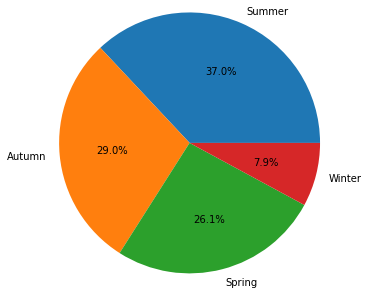

In [14]:
# Plot the chart 
plt.pie(season_wise_analysis['Booking_percentage'],labels=season_wise_analysis['Seasons'],radius=1.5,autopct='%1.1f%%')
plt.show()

**Observation**
- The highest number of bikes rented in the summer season and lowest number of bikes rented in the Winter Season
- One of the reasons for lower booking in winter could be the temperature, so we assume that temperature plays the major role in rental bike booking (We’ll verify this while plot temp. v/s Rental Bike count)

### Holiday wise analysis

In [15]:
# Let's perform Holiday wise analysis
holiday_wise_Analisis=df.groupby('Holiday')['Rented Bike Count'].sum().reset_index().sort_values(by='Rented Bike Count',ascending=False)

# Get the percentage wise booking
holiday_wise_Analisis['Booking_percentage']=holiday_wise_Analisis['Rented Bike Count']/holiday_wise_Analisis['Rented Bike Count'].sum()*100
holiday_wise_Analisis

,Holiday,Rented Bike Count,Booking_percentage
1,No Holiday,5956419,96.502203
0,Holiday,215895,3.497797


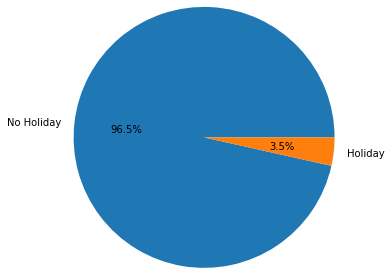

In [16]:
# Plot the chart 
plt.pie(holiday_wise_Analisis['Booking_percentage'],labels=holiday_wise_Analisis['Holiday'],radius=1.5,autopct='%1.1f%%')
plt.show()

**Observation**
- More than 90% of bikes have been rented on Non-holiday, and only 10% of bikes rented on holidays
- From this result, we can assume that most working professionals are using the Seoul bike to rent a bike to travel to the workplace

### Functioning Day wise analysis*



In [17]:
# perform functioning day wise analysis
functioning_day_wise_analysis=df.groupby('Functioning Day')['Rented Bike Count'].sum().reset_index().sort_values(by='Rented Bike Count',ascending=False)

# Get the percentage wise booking
functioning_day_wise_analysis['Booking_percentage']=functioning_day_wise_analysis['Rented Bike Count']/functioning_day_wise_analysis['Rented Bike Count'].sum()*100
functioning_day_wise_analysis

,Functioning Day,Rented Bike Count,Booking_percentage
1,Yes,6172314,100.0
0,No,0,0.0


**Observation**
- No Bikes are rented on Non-Functional days so It’s off for the Seoul bike


### Hour wise analysis

In [18]:
# Let's perform Hour wise analysis
hour_wise_Analisis=df.groupby(['Hour'])['Rented Bike Count'].mean().reset_index()
hour_wise_Analisis

,Hour,Rented Bike Count
0,0,541.460274
1,1,426.183562
2,2,301.630137
3,3,203.331507
4,4,132.591781
5,5,139.082192
6,6,287.564384
7,7,606.005479
8,8,1015.701370
9,9,645.983562


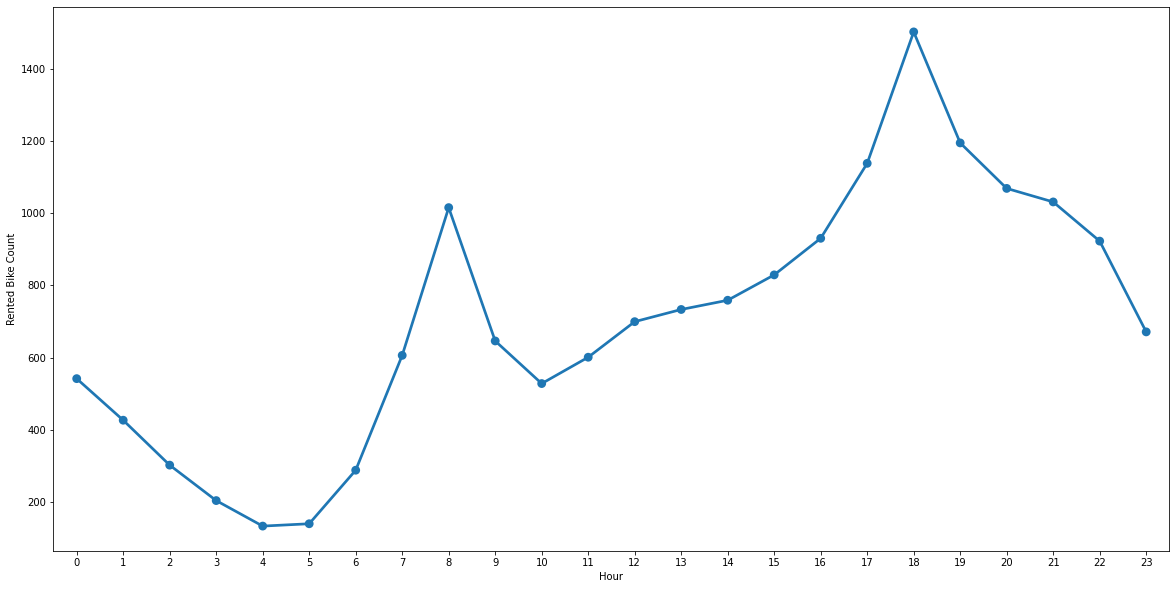

In [19]:
# Plot the chart 
plt.figure(figsize=(20,10))
sns.pointplot(x=hour_wise_Analisis['Hour'],y=hour_wise_Analisis['Rented Bike Count'])
plt.show()

**Observation**
- Rented bikes numbers stay low during the Night-time (10 PM to 5 AM) and after noon time ()
- No. of the bike count getting an increase from 6 AM and during the time (6 AM to 8 AM) chart reach at its first pick
The same shape of the curve can be shown from (12 pm to 7 PM), At 7 PM highest number of bikes has been rented

# Plot each variable individually and check data distribution

In [399]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'week'],
      dtype='object')

In [409]:
numeric_features=['Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

In [401]:
categoric_features=['Seasons','Holiday', 'Functioning Day', 'week']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


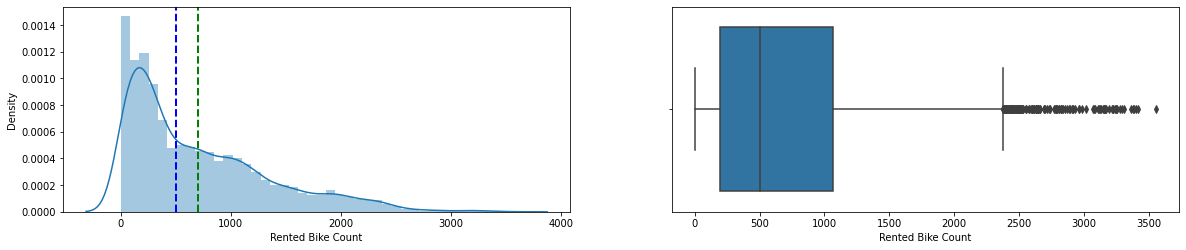

In [23]:

plt.figure(figsize = (20,40))
plt.subplot(9,2,1)
sns.distplot(df['Rented Bike Count'])
plt.axvline(df['Rented Bike Count'].mean(), color='green', linestyle='dashed', linewidth=2)
plt.axvline(df['Rented Bike Count'].median(), color='blue', linestyle='dashed', linewidth=2)
plt.subplot(9,2,2)
sns.boxplot(df['Rented Bike Count'])
plt.show()

In [24]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

No Warning Shown


**** Temperature(°C) Data Distribution ****


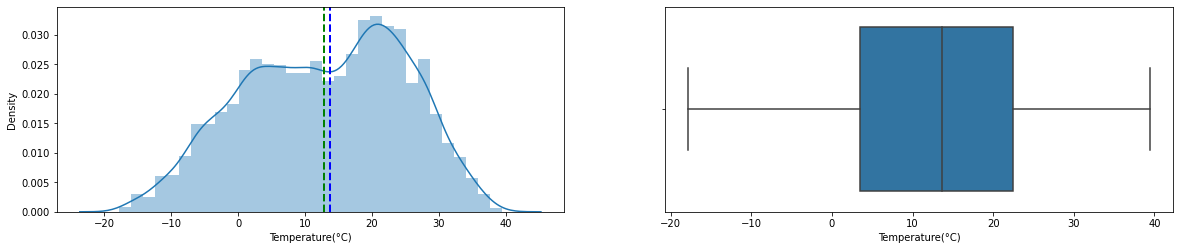


 

**** Humidity(%) Data Distribution ****


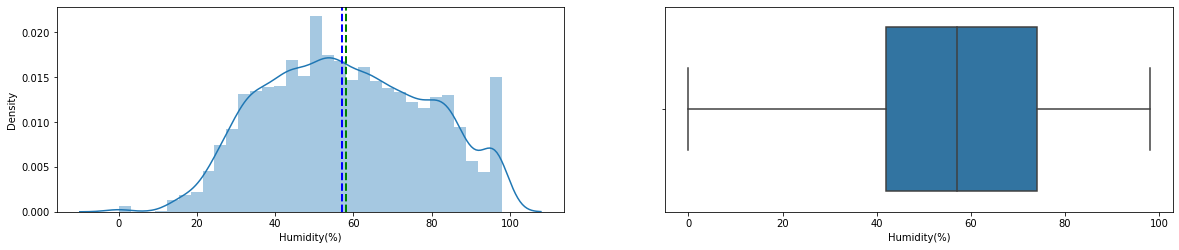


 

**** Wind speed (m/s) Data Distribution ****


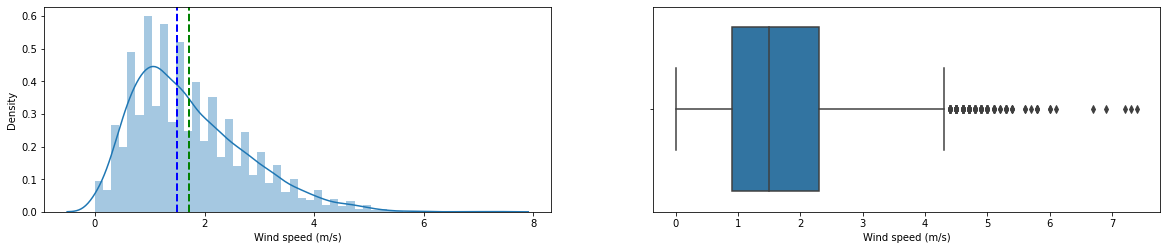


 

**** Visibility (10m) Data Distribution ****


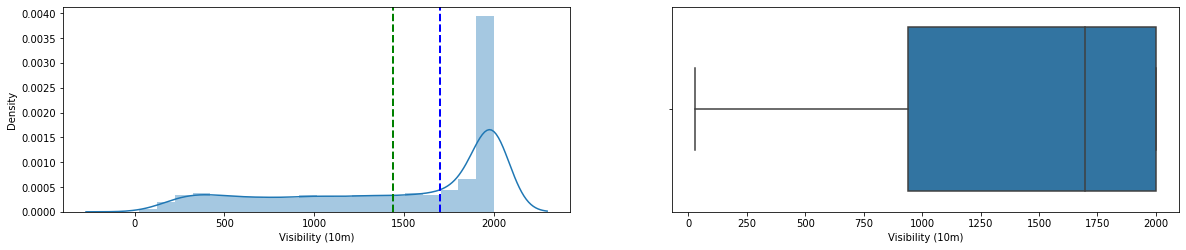


 

**** Dew point temperature(°C) Data Distribution ****


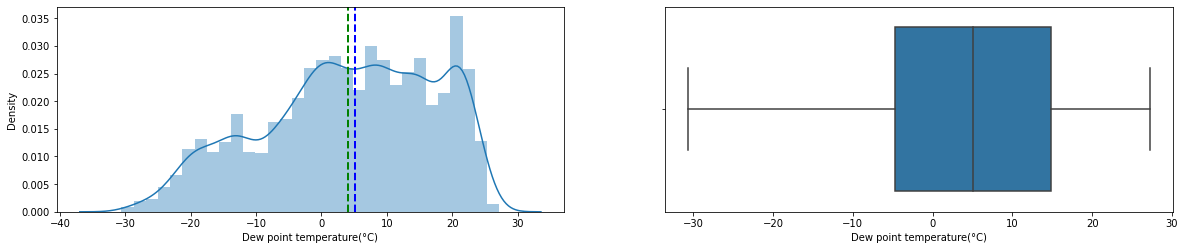


 

**** Solar Radiation (MJ/m2) Data Distribution ****


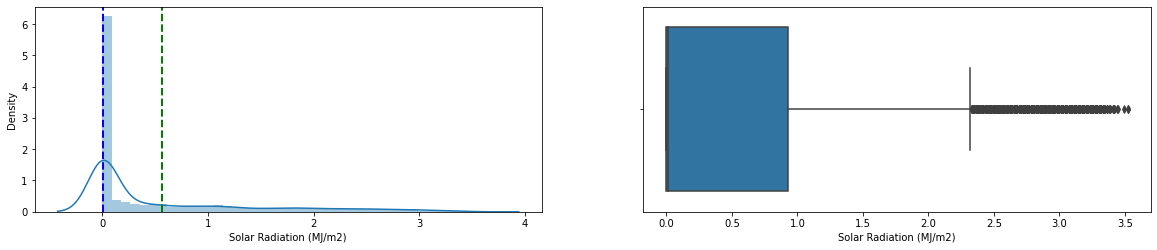


 

**** Rainfall(mm) Data Distribution ****


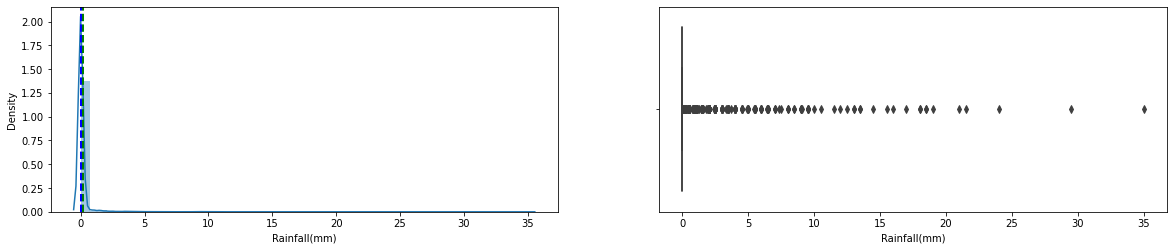


 

**** Snowfall (cm) Data Distribution ****


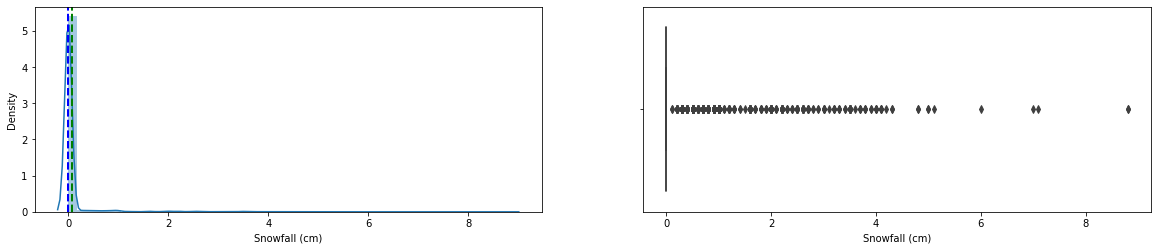

In [25]:
for i in numeric_features:
  print(f'**** {i} Data Distribution ****')
  plt.figure(figsize = (20,40))
  plt.subplot(9,2,1)
  sns.distplot(df[i])
  plt.axvline(df[i].mean(), color='green', linestyle='dashed', linewidth=2)
  plt.axvline(df[i].median(), color='blue', linestyle='dashed', linewidth=2)
  plt.subplot(9,2,2)
  sns.boxplot(df[i])
  plt.show()
  print('\n \n')

# Plot each variable versus the target variable

**** Temperature(°C) versus "Rented Bike Count"****


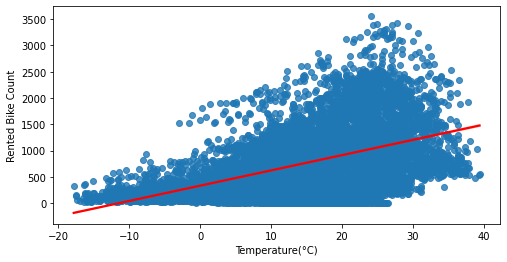


 

**** Humidity(%) versus "Rented Bike Count"****


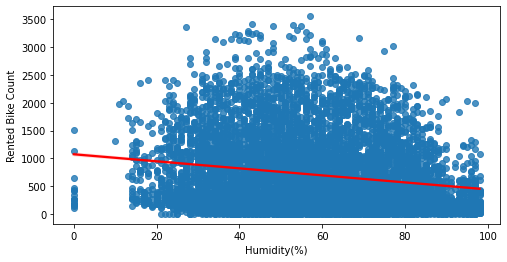


 

**** Wind speed (m/s) versus "Rented Bike Count"****


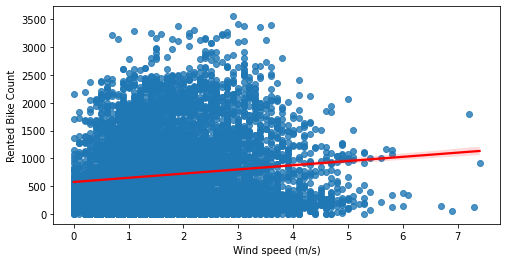


 

**** Visibility (10m) versus "Rented Bike Count"****


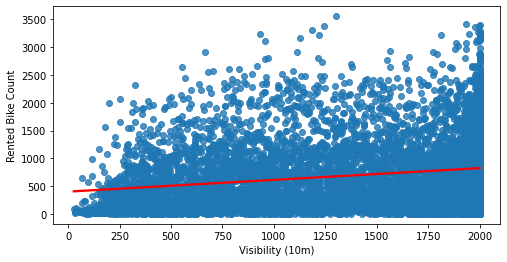


 

**** Dew point temperature(°C) versus "Rented Bike Count"****


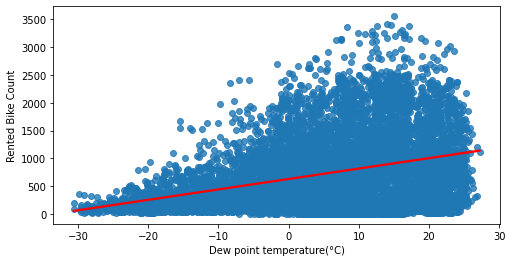


 

**** Solar Radiation (MJ/m2) versus "Rented Bike Count"****


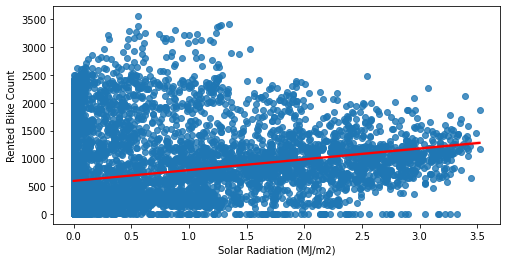


 

**** Rainfall(mm) versus "Rented Bike Count"****


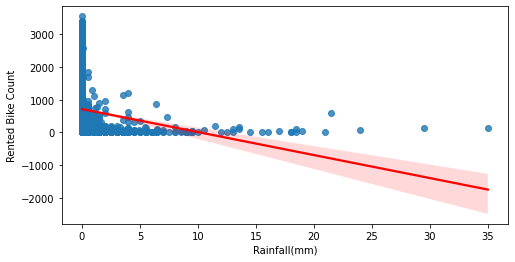


 

**** Snowfall (cm) versus "Rented Bike Count"****


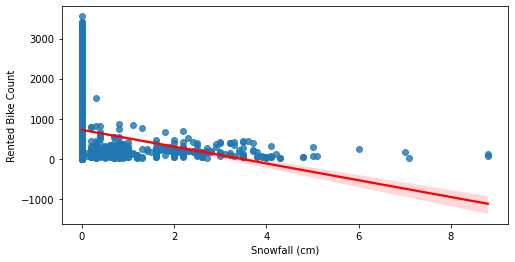

In [26]:
for i in numeric_features:
  print(f'**** {i} versus "Rented Bike Count"****')
  plt.figure(figsize = (8,4))
  sns.regplot(x=df[i],y=df['Rented Bike Count'],line_kws={"color": "red"})
  plt.show()
  print('\n \n')

In [403]:
numeric_features2=['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)','Rented Bike Count']

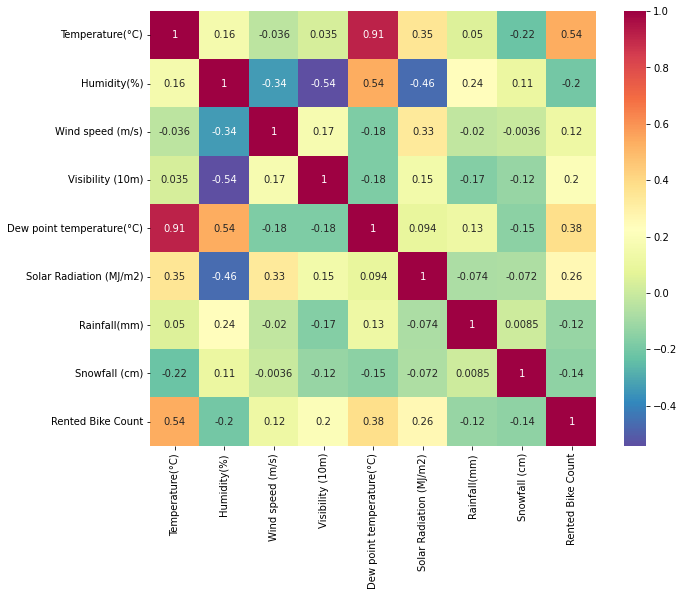

In [404]:
#Ploat heat map
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_features2].corr(),annot= True,cmap='Spectral_r')

In [406]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [411]:
calc_vif(df[[i for i in  numeric_features if i not in ['Dew point temperature(°C)']]])

,variables,VIF
0,Temperature(°C),3.166007
1,Humidity(%),4.758651
2,Wind speed (m/s),4.079926
3,Visibility (10m),4.409448
4,Solar Radiation (MJ/m2),2.246238
5,Rainfall(mm),1.078501
6,Snowfall (cm),1.118901


In [416]:
#Drop column Dew point temperature(°C)
df.drop(columns=['Dew point temperature(°C)'],inplace=True)

In [421]:
label_en = {"Holiday":{"No Holiday":1,"Holiday":0},
                 "Functioning Day":{"Yes":1,"No":0}}

df = df.replace(label_en)

In [ ]:
# One hot encoding
df=pd.get_dummies(df,columns=['Seasons'])

In [422]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,week,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,1,48,0,0,0,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,1,48,0,0,0,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,1,1,48,0,0,0,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,1,1,48,0,0,0,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,1,1,48,0,0,0,1


# New Section

In [425]:
df.columns
features=['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Functioning Day', 'week',
       'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter']